In [1]:
from __future__ import print_function

import sys
sys.path.append('../src/')

from almaDatabaseQuery import *

import matplotlib.pyplot as plt
import numpy as np
import math
from astropy import units as u
from astropy.coordinates import SkyCoord
from mpl_toolkits.basemap import Basemap # need to install basemap and geos 
from allskymap import AllSkyMap # need to install pyproj

%matplotlib inline

In [2]:
q = databaseQuery()

In [3]:
report, resume = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    minTimeBand={3:60., 6:60., 7:60.}, \
                                    silent=True)

Number of accepted source:  186


In [4]:
report_non, resume_non = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    minTimeBand={3:60., 6:60., 7:60.}, \
                                    nonALMACAL = True, \
                                    silent=True)

Number of accepted source:  134


In [5]:
report_almacal, resume_almacal = q.select_object_from_sqldb("calibrators_brighterthan_0.1Jy_20180419.db", \
                                    maxFreqRes=999999999, array='12m', \
                                    excludeCycle0=True, \
                                    selectPol=False, \
                                    minTimeBand={3:60., 6:60., 7:60.}, \
                                    onlyALMACAL = True, \
                                    silent=True)

Number of accepted source:  52


In [6]:
ra_non, dec_non, glon_non, glat_non, nproj_non = [], [], [], [], []
ra_alm, dec_alm, glon_alm, glat_alm, nproj_alm = [], [], [], [], []

for i,idata in enumerate(resume_non):
    ra_non.append(idata[1])
    dec_non.append(idata[2])
    glon_non.append(idata[9])
    glat_non.append(idata[10])
    nproj_non.append(idata[7])
    
for i,idata in enumerate(resume_almacal):
    ra_alm.append(idata[1])
    dec_alm.append(idata[2])
    glon_alm.append(idata[9])
    glat_alm.append(idata[10])
    nproj_alm.append(idata[7])

### Equatorial coordinate

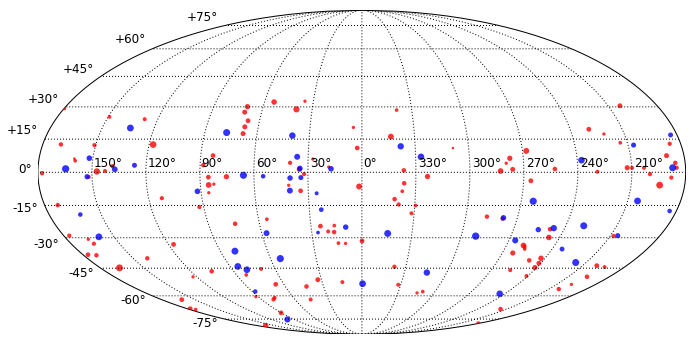

In [7]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=1, dashes=[1,2])

x, y = m(ra_non, dec_non)
cr_pts = m.scatter(x, y, s=(10*np.log(nproj_non)), c='r', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)

x, y = m(ra_alm, dec_alm)
cr_pts = m.scatter(x, y, s=(10*np.log(nproj_alm)), c='b', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)


# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()

### Galactic coordinate

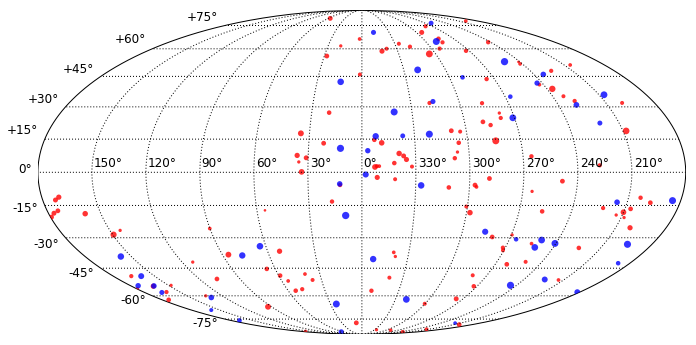

In [8]:
fig = plt.figure(figsize=(12,6))
main_ax = plt.axes([0.05, .19, .9, .75])  # rect=L,B,W,H

# Set up the projection and draw a grid.
m = AllSkyMap(ax=main_ax, projection='moll')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-75,76,15), linewidth=1, dashes=[1,2], labels=[1,0,0,0], fontsize=12)
m.drawmeridians(np.arange(-150,151,30), linewidth=1, dashes=[1,2])

x, y = m(glon_non, glat_non)
cr_pts = m.scatter(x, y, s=(10*np.log(nproj_non)), c='r', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)

x, y = m(glon_alm, glat_alm)
cr_pts = m.scatter(x, y, s=(10*np.log(nproj_alm)), c='b', marker='o', linewidths=0.5, edgecolors='none', alpha=0.8)

# Label a subset of meridians.
lons = np.arange(-150,151,30)
m.label_meridians(lons, fontsize=12, vnudge=1, halign='left', hnudge=-1)  # nudge<0 shifts to right

plt.show()

- The distribution looks similar
- ALMACAL sample (blue) has larger number of projects (symbol size).

In [9]:
print("Average number of project per obj: ")
print("NON ALMACAL ", np.mean(nproj_non))
print("ALMACAL: ", np.mean(nproj_alm))

print("\nMinimum number of project per obj: ")
print("NON ALMACAL ", np.min(nproj_non))
print("ALMACAL: ", np.min(nproj_alm))

print("\nMaximum number of project per obj: ")
print("NON ALMACAL ", np.max(nproj_non))
print("ALMACAL: ", np.max(nproj_alm))

Average number of project per obj: 
NON ALMACAL  11.1044776119
ALMACAL:  62.0192307692

Minimum number of project per obj: 
NON ALMACAL  2
ALMACAL:  4

Maximum number of project per obj: 
NON ALMACAL  119
ALMACAL:  206
